In [1]:
import os
from zipfile import ZipFile

# app.py
# call api 
# 1. According to kaggle website, api call require install package in pip -> pip install )
# 2. After install go to kaggle account page  https://www.kaggle.com/<username>/account to get api token
# 3. Place downloaded json file C:\Users\<Windows-username>\.kaggle\kaggle.json
os.system("kaggle datasets download -d olistbr/brazilian-ecommerce")
with ZipFile('brazilian-ecommerce.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()


os.system("kaggle datasets download -d olistbr/marketing-funnel-olist")
with ZipFile('marketing-funnel-olist.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('max_colwidth',100)


customers=pd.read_csv('olist_customers_dataset.csv')
geolocation=pd.read_csv('olist_geolocation_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')
order_payments=pd.read_csv('olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
translation=pd.read_csv('product_category_name_translation.csv')


orders_full=pd.merge(orders,order_items,on='order_id',how='left')
orders_full=pd.merge(orders_full,products,on='product_id',how='left')


#translate to English
orders_full=pd.merge(orders_full,translation,on='product_category_name',how='left')


In [3]:

orders_full=pd.merge(orders,order_items,on='order_id',how='left')
orders_full=pd.merge(orders_full,products,on='product_id',how='left')
orders_full= pd.merge(orders_full, order_reviews, on="order_id")



In [4]:

#separate date and time of oder purchase timestamp
variable_split= orders_full['order_purchase_timestamp'].str.split(' ')

#create a new colum with only the date
orders_full['order_purchase_date']=variable_split.str.get(0)


#separete the date into day, month, year
#separate date and time, for this i need the date without time specifications
variable_split= orders_full['order_purchase_date'].str.split('-')


orders_full['year']=variable_split.str.get(0)
orders_full['month']=variable_split.str.get(1)
orders_full['day']=variable_split.str.get(2)
#graph with the total sales- price- over time
#set time 
orders_full["order_purchase_date"]= pd.to_datetime(orders_full["order_purchase_date"])


In [5]:
#SEPARATE DATE AND TIME FOR THE 4 COLUMNS IN LOG
variable_split= orders_full["order_approved_at"].str.split(' ')

orders_full['approved_date']=variable_split.str.get(0)



variable_split= orders_full["order_delivered_carrier_date"].str.split(' ')

orders_full['order_carrier_date']=variable_split.str.get(0)



variable_split= orders_full["order_delivered_customer_date"].str.split(' ')

orders_full['order_delivered_date']=variable_split.str.get(0)



variable_split= orders_full["order_estimated_delivery_date"].str.split(' ')

orders_full['est_delivery_date']=variable_split.str.get(0)

In [6]:
#Transformar all the new columns into datatime
orders_full["approved_date"]= pd.to_datetime(orders_full["approved_date"])

orders_full["order_carrier_date"]= pd.to_datetime(orders_full["order_carrier_date"])

orders_full["order_delivered_date"]= pd.to_datetime(orders_full["order_delivered_date"])

orders_full["est_delivery_date"]= pd.to_datetime(orders_full["est_delivery_date"])

In [7]:
#calculate the logistics gap between the time columns
orders_full["gap1"]= orders_full["order_carrier_date"] - orders_full["approved_date"]


orders_full["gap2"]= orders_full["order_delivered_date"] - orders_full["order_carrier_date"]


orders_full["gap3"]= orders_full["est_delivery_date"] - orders_full["order_delivered_date"]

In [8]:
#Drop the missing values
orders_full= orders_full.dropna(subset=["gap1","gap2","gap3"])


In [9]:
#Transform the gap1, gap2, gap3 datatype to int
orders_full.head()
orders_full["gap1"]= orders_full["gap1"].astype('timedelta64[D]').astype(int)
orders_full["gap2"]= orders_full["gap2"].astype('timedelta64[D]').astype(int)
orders_full["gap3"]= orders_full["gap3"].astype('timedelta64[D]').astype(int)


In [10]:
orders_full.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_date,year,month,day,approved_date,order_carrier_date,order_delivered_date,est_delivery_date,gap1,gap2,gap3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio be...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10-02,2017,10,02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,6,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,2018-07-24,2018,07,24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,0,12,6
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,2018-08-08,2018,08,08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,0,9,18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e estava descrito no site e chegou bem antes da data ...,2017-12-03 00:00:00,2017-12-05 19:21:58,2017-11-18,2017,11,18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,4,10,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2018-02-13,2018,02,13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,1,2,10


In [11]:
fast_seller=orders_full[['seller_id','gap2']]
fast_seller=pd.merge(fast_seller, sellers, on='seller_id' )

fast_seller = fast_seller.rename(columns = {'gap2': 'delivery_time'}, inplace = False)

fast_seller.head(10)

,seller_id,delivery_time,seller_zip_code_prefix,seller_city,seller_state
0,3504c0cb71d7fa48d967e0e4c94d59d9,6,9350,maua,SP
1,3504c0cb71d7fa48d967e0e4c94d59d9,5,9350,maua,SP
2,3504c0cb71d7fa48d967e0e4c94d59d9,5,9350,maua,SP
3,3504c0cb71d7fa48d967e0e4c94d59d9,2,9350,maua,SP
4,3504c0cb71d7fa48d967e0e4c94d59d9,6,9350,maua,SP
5,3504c0cb71d7fa48d967e0e4c94d59d9,8,9350,maua,SP
6,3504c0cb71d7fa48d967e0e4c94d59d9,1,9350,maua,SP
7,3504c0cb71d7fa48d967e0e4c94d59d9,5,9350,maua,SP
8,3504c0cb71d7fa48d967e0e4c94d59d9,11,9350,maua,SP
9,3504c0cb71d7fa48d967e0e4c94d59d9,7,9350,maua,SP


## Where did the customer come from?

<AxesSubplot:title={'center':'Customer cites - Top20'}, ylabel='customer_city'>

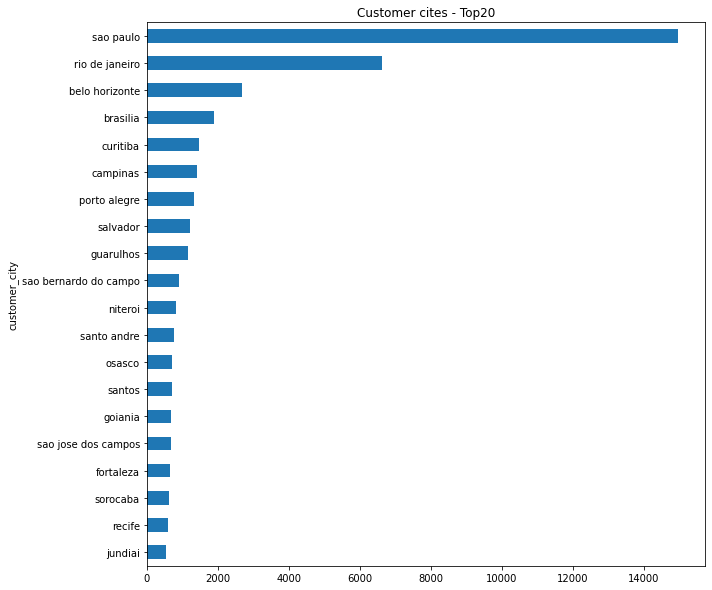

In [13]:

customers_geo=pd.merge(customers,geolocation,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

#concat seller
sellers_geo=pd.merge(sellers,geolocation,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

customer_cites=customers_geo.groupby(['customer_unique_id','customer_city']).size().sort_values()
customer_cites_counts=customer_cites.groupby(['customer_city']).size().sort_values()
#where did customer from? top20 city
customer_cites_counts.tail(20).plot(kind='barh',figsize=(10,10),title='Customer cites - Top20')



### Top 3 cities

In [15]:
customer_cites_counts.tail(3).to_frame('customer count').reset_index()


,customer_city,customer count
0,belo horizonte,2672
1,rio de janeiro,6620
2,sao paulo,14982


In [16]:
fast_seller['delivery_time'].describe()

count    110831.000000
mean          9.143741
std           8.638963
min         -16.000000
25%           4.000000
50%           7.000000
75%          12.000000
max         205.000000
Name: delivery_time, dtype: float64

## we can see the average delivery time is 7 days. We decide to recommend Olist to promote the sellers whose delivery time is 0 day. So that Olist can recommend those sellers when customers searching the relevant products.

In [17]:
bh = pd.DataFrame(fast_seller[fast_seller['seller_city'] == 'belo horizonte'])
bh = pd.DataFrame(bh[bh['delivery_time'] <= 0])
bh.count()


seller_id                 11
delivery_time             11
seller_zip_code_prefix    11
seller_city               11
seller_state              11
dtype: int64

## 'belo horizonte' fast seller list:

In [18]:

print(bh['seller_id'])


14408    85d9eb9ddc5d00ca9336a2219c97bb13
14461    85d9eb9ddc5d00ca9336a2219c97bb13
14855    85d9eb9ddc5d00ca9336a2219c97bb13
66448    fc906263ca5083d09dce42fe02247800
70674    282f23a9769b2690c5dda22e316f9941
79964    dd2bdf855a9172734fbc3744021ae9b9
79991    dd2bdf855a9172734fbc3744021ae9b9
80008    dd2bdf855a9172734fbc3744021ae9b9
80040    dd2bdf855a9172734fbc3744021ae9b9
80066    dd2bdf855a9172734fbc3744021ae9b9
92619    05f51e13da97139648b8125c31e5f51b
Name: seller_id, dtype: object


## 'rio de janeiro' fast seller list:

In [19]:
rdj = pd.DataFrame(fast_seller[fast_seller['seller_city'] == 'rio de janeiro'])
bh.groupby(['seller_id'])
rdj = pd.DataFrame(rdj[rdj['delivery_time'] <= 0])
rdj.count()

seller_id                 12
delivery_time             12
seller_zip_code_prefix    12
seller_city               12
seller_state              12
dtype: int64

In [20]:
print(rdj['seller_id'])

20806     f84a00e60c73a49e7e851c9bdca3a5bb
27786     7a425d299613df3e613bcf9d2eaf5c49
40018     46dc3b2cc0980fb8ec44634e21d2718e
40133     46dc3b2cc0980fb8ec44634e21d2718e
40464     46dc3b2cc0980fb8ec44634e21d2718e
97246     db46ca7bce82b11f7e247539271fc390
98522     de66a66f2dd06bb9ec37aa96987466a3
99882     b74d1c09cb380e1d03a6f859c6f4224b
101945    fad44952713764836814be105382aee5
105345    961dff0a659b4561334372337dd897d9
105347    961dff0a659b4561334372337dd897d9
108444    6e0908ef4d4efadbc3cc2b74ea477cb0
Name: seller_id, dtype: object


## 'sao paulo' fast seller list

In [21]:
sp = pd.DataFrame(fast_seller[fast_seller['seller_city'] == 'sao paulo'])
sp.groupby(['seller_id'])
sp = pd.DataFrame(sp[sp['delivery_time'] <= 0])
sp.count()

seller_id                 129
delivery_time             129
seller_zip_code_prefix    129
seller_city               129
seller_state              129
dtype: int64

In [22]:
print(sp['seller_id'])

5680      ea8482cd71df3c1969d7b9473ff13abc
9257      8b321bb669392f5163d04c59e235e066
9351      8b321bb669392f5163d04c59e235e066
9630      8b321bb669392f5163d04c59e235e066
9679      8b321bb669392f5163d04c59e235e066
10022     8b321bb669392f5163d04c59e235e066
12903     955fee9216a65b617aa5c0531780ce60
13094     955fee9216a65b617aa5c0531780ce60
13697     955fee9216a65b617aa5c0531780ce60
14098     955fee9216a65b617aa5c0531780ce60
17473     1025f0e2d44d7041d6cf58b6550e0bfa
17608     1025f0e2d44d7041d6cf58b6550e0bfa
18223     1025f0e2d44d7041d6cf58b6550e0bfa
20063     5b925e1d006e9476d738aa200751b73b
21922     6560211a19b47992c3666cc44a7e94c0
21929     6560211a19b47992c3666cc44a7e94c0
22020     6560211a19b47992c3666cc44a7e94c0
22360     6560211a19b47992c3666cc44a7e94c0
22579     6560211a19b47992c3666cc44a7e94c0
22614     6560211a19b47992c3666cc44a7e94c0
25324     76d5af76d0271110f9af36c92573f765
25693     e5a38146df062edaf55c38afa99e42dc
34334     ef506c96320abeedfb894c34db06f478
36128     4